# Proyecto K - Medias

In [33]:
# Importaciones necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import joblib

## Paso 1: Cargar el conjunto de datos

In [3]:
# Cargar el dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
df = pd.read_csv(url, delimiter=',')
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### Analisis y limpieza de datos

> Nota: nos indican que solo se requieren las columnas Latitude, Longitude y MedInc, si que vamos a eliminar las demas

In [4]:
# Eliminar las columnas innecesarias para ese ejercicio
X =df.drop(['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal'],axis=1)
X.shape

(20640, 3)

In [5]:
X.dtypes

MedInc       float64
Latitude     float64
Longitude    float64
dtype: object

In [6]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
Latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
Longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100


In [ ]:
X.isnull().any() # Validar valores nulos

MedInc       False
Latitude     False
Longitude    False
dtype: bool

In [ ]:
X[X.duplicated(keep=False)] # Validar filas duplicadas

,MedInc,Latitude,Longitude
4569,2.3438,34.07,-118.27
4571,2.3438,34.07,-118.27
4605,15.0001,34.07,-118.33
4606,15.0001,34.07,-118.33
5291,15.0001,34.08,-118.42
8852,15.0001,34.08,-118.42
8853,15.0001,34.07,-118.41
8854,15.0001,34.07,-118.41
16328,4.3008,38.02,-121.33
16331,4.3008,38.02,-121.33


In [9]:
# Ya que encontramos filas duplicadas vamos a eliminarlas
X = X.drop_duplicates()
X.shape

(20635, 3)

### Dividir el conjunto de datos

> Nota: Ya que este es un modelo de aprendizaje no supervisado no se hará division de variable objetivo, es decir Y, solo dividiremos X en train y test

In [10]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
X_train.shape

(16508, 3)

### Escalar los datos

In [ ]:
# Escalar los datos por separado para evitar fuga de datos
escalador = StandardScaler()
X_train_escalado = escalador.fit_transform(X_train)  
X_test_escalado =  escalador.transform(X_test)

## Paso 2: Construir un K-Means

In [ ]:
modelo_kmeans = KMeans(n_clusters = 6, random_state = 42) # Constrir el modelo
train_labels = modelo_kmeans.fit_predict(X_train_escalado) # Entrenamos y predecimos con el conjunto de entrenamiento

## Paso 3: Predecir con el conjunto de test

In [ ]:
test_labels = modelo_kmeans.predict(X_test_escalado) # Hacemos solo predicciones en el conjunto de prueba

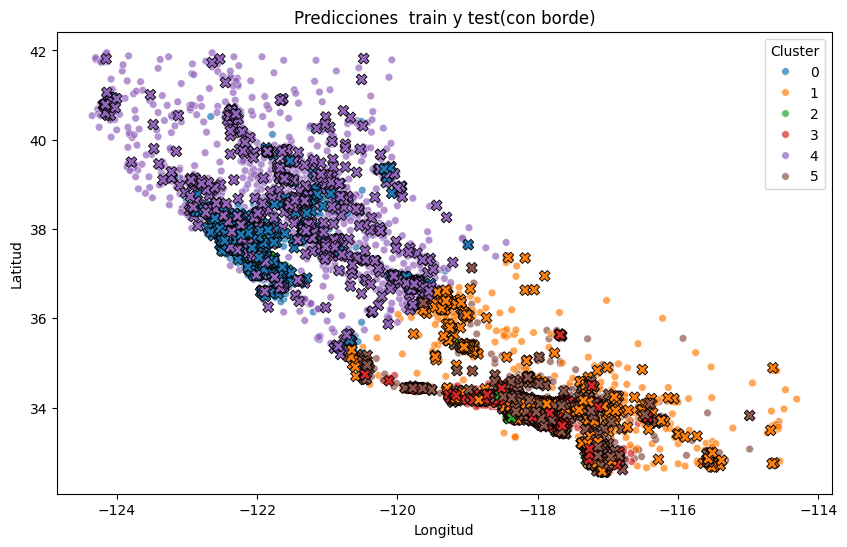

In [30]:
# Crear DataFrames para visualización
X_train_plot = X_train.copy() # Crea una copia del dataframe de entrenamiento
X_train_plot['cluster'] = train_labels # Añade una columna 'cluster' con los train labels
X_test_plot = X_test.copy() # Crea una copia del dataframe de test
X_test_plot['cluster'] = test_labels # Añade una columna 'cluster' con los test labels

# Graficamos los cluster de entrenamiento y test usando longitud y latitud como ejes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train_plot, x="Longitude", y="Latitude", hue="cluster", palette="tab10", s=30, alpha=0.7)
sns.scatterplot(data=X_test_plot, x="Longitude", y="Latitude", hue="cluster", palette="tab10", s=60, marker="X", edgecolor='black', legend=False)
plt.title("Predicciones  train y test(con borde)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend(title="Cluster")
plt.show()

## Paso 4: Entrenar un modelo de clasificación supervisada

In [31]:
# Entrenamos un modelo knn vecinos
knn = KNeighborsClassifier(n_neighbors=5) # Creamos el modelo
knn.fit(X_train_escalado, train_labels) # Entrenamos el modelo con los datos de entrenamiento

y_pred = knn.predict(X_test_escalado) # Hacemos predicciones con los datos de test con el modelo knn 

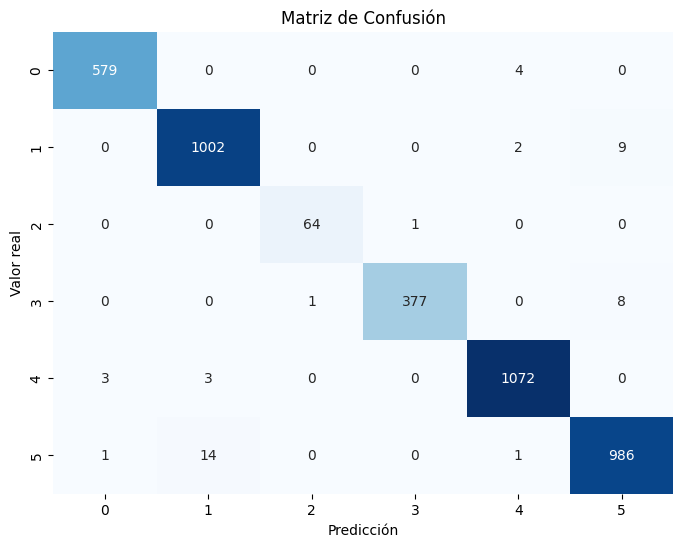

In [32]:
# Calcular matriz de confusión
cm = confusion_matrix(test_labels, y_pred)

# Crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(len(cm)),
            yticklabels=range(len(cm)))

plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión')
plt.show()

In [29]:
print('================Reporte de clasificación==============')
print(classification_report(test_labels, y_pred))

================Reporte de clasificación==============
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       583
           1       0.98      0.99      0.99      1013
           2       0.98      0.98      0.98        65
           3       1.00      0.98      0.99       386
           4       0.99      0.99      0.99      1078
           5       0.98      0.98      0.98      1002

    accuracy                           0.99      4127
   macro avg       0.99      0.99      0.99      4127
weighted avg       0.99      0.99      0.99      4127



Observacion final:
Las métricas de accuracy 99%, precision recall y f1 score, ademas de la matriz de confusión muestran que el modelo KNN está imitando casi perfectamente al de de KMeans, indica casi que perfecta concordancia entre ambos.

En este caso no se posee un patron de medida que nos indique si los cluster predichos por ambos modelos con verdaderos, asi que es un buen ejercicio para explorar como funciona el modelo no supervisado.

## Paso 5: Guardar los modelos

In [34]:
joblib.dump(knn, '../models/modelo_knn.pkl')
joblib.dump(modelo_kmeans, '../models/modelo_kmeans.pkl')

['../models/modelo_kmeans.pkl']